In [ ]:
!pip install --upgrade pip
!pip install fosforml numpy pandas matplotlib scikit-learn seaborn python-dateutil
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install fosforml 
!pip install fosforio
!pip install refractio
!pip install refractml

In [ ]:
!pip install seaborn scipy xgboost pandas dice-ml tabulate numpy scikit-learn pandas-profiling plotly matplotlib scipy statsmodels seaborn pydantic-settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy.stats.mstats import winsorize
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from fosforml import *
from fosforml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
from refractio import snowflake
snowflake.get_connection(connection_name="HR_ATTRITION")

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.
Exception occurred in getting snowflake connection: 'connectionSources'


In [39]:
df = snowflake.get_dataframe("HR_ATTRITION")
df

,SALARY,EMPLOYEE_ID,JOB_SATISFACTION,PERCENTAGE_SALARY_HIKE,PERFORMANCE_RATING,OVER_TIME,RELATIONSHIP_SATISFACTION,CHURN_STATUS_TABLE,CHURN_VALUE_TABLE,CITY,...,RETENTION,SUM_OF_TENURE,SUM_OF_AGE,JOB_STARTDATE,JOB_ENDDATE,OVERTIME_HOURS,WORK_LIFE_BALANCE,BUSINESS_TRAVEL,ENVIRONMENT_SATISFACTION,USER_ID
0,43118.65,94215814,High,20,Outstanding,No,Medium,FALSE,0,Charlotte,...,0,0,0,2016-06-01,2019-08-01,4,Best,Travel Rarely,Medium,334493477
1,40808.18,72815065,Very High,12,Low,No,Very High,TRUE,1,Charlotte,...,0,0,0,2015-05-01,None,7,Best,Travel Frequently,Low,713161033
2,36394.69,14265310,Low,13,Good,No,Medium,FALSE,0,Pittsburgh,...,0,0,0,2017-06-01,2018-07-01,8,Good,Travel Rarely,High,154131612
3,96880.66,38467325,Low,21,Good,No,Very High,FALSE,0,Dallas,...,0,0,0,2019-09-01,2024-07-01,14,Bad,Travel Rarely,Very High,518711452
4,97579.66,98539130,High,17,Good,No,Low,FALSE,0,Dallas,...,0,0,0,2019-09-01,2024-08-01,9,Best,Travel Frequently,Low,518711452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,101713.50,66752547,Low,17,Good,No,Very High,FALSE,0,Houston,...,0,0,0,2021-12-01,2023-06-01,1,Good,Travel Rarely,Low,492160448
299996,101640.50,61579487,High,13,Excellent,No,Very High,FALSE,0,Houston,...,0,0,0,2021-12-01,2023-06-01,1,Best,Travel Frequently,Low,492160448
299997,101998.50,48056583,Very High,21,Outstanding,No,Medium,FALSE,0,Houston,...,0,0,0,2021-12-01,2023-06-01,1,Good,Travel Rarely,Low,492160448
299998,101306.50,86413761,Medium,20,Low,No,Low,FALSE,0,Houston,...,609,37548,9563,2021-12-01,2023-06-01,1,Best,Travel Frequently,Medium,492160448


In [40]:
print(df.isnull().sum())

SALARY                                             0
EMPLOYEE_ID                                        0
JOB_SATISFACTION                                   0
PERCENTAGE_SALARY_HIKE                             0
PERFORMANCE_RATING                                 0
OVER_TIME                                          0
RELATIONSHIP_SATISFACTION                          0
CHURN_STATUS_TABLE                                 0
CHURN_VALUE_TABLE                                  0
CITY                                               0
DISTANCE                                           0
DEGREE_CLEAN                                       0
ETHNICITY                                          0
MARITAL_STATUS                                     0
ROLE                                               0
COMPANY                                            0
ORGANIZATION_TYPE                                  0
ORGANIZATION_OWNERSHIP                             0
STATE                                         

In [41]:
Original_df = df.dropna()

In [42]:
print(Original_df.isnull().sum())

SALARY                                         0
EMPLOYEE_ID                                    0
JOB_SATISFACTION                               0
PERCENTAGE_SALARY_HIKE                         0
PERFORMANCE_RATING                             0
OVER_TIME                                      0
RELATIONSHIP_SATISFACTION                      0
CHURN_STATUS_TABLE                             0
CHURN_VALUE_TABLE                              0
CITY                                           0
DISTANCE                                       0
DEGREE_CLEAN                                   0
ETHNICITY                                      0
MARITAL_STATUS                                 0
ROLE                                           0
COMPANY                                        0
ORGANIZATION_TYPE                              0
ORGANIZATION_OWNERSHIP                         0
STATE                                          0
COUNTRY                                        0
GENDER              

In [43]:
df = Original_df.drop(["USER_ID", "EMPLOYEE_ID", "JOB_STARTDATE", "JOB_ENDDATE", "CHURN_STATUS_TABLE","SCHOOL_ENDDATE","PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH","PEOPLE_JOINED_AND_NEVER_LEFT","POPULATION","CHURN_OTHER","RETENTION","SUM_OF_TENURE","SUM_OF_AGE"], axis = 1)

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 209924 entries, 0 to 299999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SALARY                     209924 non-null  float64
 1   JOB_SATISFACTION           209924 non-null  object 
 2   PERCENTAGE_SALARY_HIKE     209924 non-null  int8   
 3   PERFORMANCE_RATING         209924 non-null  object 
 4   OVER_TIME                  209924 non-null  object 
 5   RELATIONSHIP_SATISFACTION  209924 non-null  object 
 6   CHURN_VALUE_TABLE          209924 non-null  int8   
 7   CITY                       209924 non-null  object 
 8   DISTANCE                   209924 non-null  object 
 9   DEGREE_CLEAN               209924 non-null  object 
 10  ETHNICITY                  209924 non-null  object 
 11  MARITAL_STATUS             209924 non-null  object 
 12  ROLE                       209924 non-null  object 
 13  COMPANY                    209924 

In [48]:
CATEGORICAL_COLUMNS = ["ROLE","GENDER", "ETHNICITY","ORGANIZATION_TYPE", "ORGANIZATION_OWNERSHIP","COMPANY","CITY","STATE","COUNTRY","DISTANCE",
                       "DEGREE_CLEAN","BUSINESS_TRAVEL","ENVIRONMENT_SATISFACTION","JOB_SATISFACTION","MARITAL_STATUS","OVER_TIME","PERFORMANCE_RATING","RELATIONSHIP_SATISFACTION","WORK_LIFE_BALANCE"]
NUMERICAL_COLUMNS = ["SALARY", "SENIORITY", "TENURE_MONTHS", "MONTHS_AFTER_COLLEGE", "BIRTH_YEAR","AGE","OVERTIME_HOURS","PERCENTAGE_SALARY_HIKE"]
LABEL_COLUMNS = ["CHURN_VALUE_TABLE"]
DROPPED_COLUMNS = ["USER_ID", "EMPLOYEE_ID", "JOB_STARTDATE", "JOB_ENDDATE", "CHURN_STATUS_TABLE","SCHOOL_ENDDATE","PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH","PEOPLE_JOINED_AND_NEVER_LEFT","POPULATION","CHURN_OTHER","RETENTION","SUM_OF_TENURE","SUM_OF_AGE"]

In [49]:
# Verify filtered label columns
print("Label columns:", LABEL_COLUMNS)

Label columns: ['CHURN_VALUE_TABLE']


In [50]:
# Verify feature columns
print("Feature columns:", feature_columns)

Feature columns: ['ROLE', 'GENDER', 'ETHNICITY', 'ORGANIZATION_TYPE', 'ORGANIZATION_OWNERSHIP', 'COMPANY', 'CITY', 'STATE', 'COUNTRY', 'DISTANCE', 'DEGREE_CLEAN', 'BUSINESS_TRAVEL', 'ENVIRONMENT_SATISFACTION', 'JOB_SATISFACTION', 'MARITAL_STATUS', 'OVER_TIME', 'PERFORMANCE_RATING', 'RELATIONSHIP_SATISFACTION', 'WORK_LIFE_BALANCE', 'SALARY', 'SENIORITY', 'TENURE_MONTHS', 'MONTHS_AFTER_COLLEGE', 'BIRTH_YEAR', 'AGE', 'OVERTIME_HOURS', 'PERCENTAGE_SALARY_HIKE']


In [51]:
feature_columns

['ROLE',
 'GENDER',
 'ETHNICITY',
 'ORGANIZATION_TYPE',
 'ORGANIZATION_OWNERSHIP',
 'COMPANY',
 'CITY',
 'STATE',
 'COUNTRY',
 'DISTANCE',
 'DEGREE_CLEAN',
 'BUSINESS_TRAVEL',
 'ENVIRONMENT_SATISFACTION',
 'JOB_SATISFACTION',
 'MARITAL_STATUS',
 'OVER_TIME',
 'PERFORMANCE_RATING',
 'RELATIONSHIP_SATISFACTION',
 'WORK_LIFE_BALANCE',
 'SALARY',
 'SENIORITY',
 'TENURE_MONTHS',
 'MONTHS_AFTER_COLLEGE',
 'BIRTH_YEAR',
 'AGE',
 'OVERTIME_HOURS',
 'PERCENTAGE_SALARY_HIKE']

In [56]:
# Filter feature columns
feature_columns = CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS
feature_columns = [col for col in feature_columns if col in Original_df.columns]
LABEL_COLUMNS = [col for col in LABEL_COLUMNS if col in Original_df.columns]
 
# Split data into features and labels
X = Original_df[feature_columns + DROPPED_COLUMNS]
y = Original_df[LABEL_COLUMNS].values.ravel()  # Flatten to 1D array for consistency

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
X_test

,ROLE,GENDER,ETHNICITY,ORGANIZATION_TYPE,ORGANIZATION_OWNERSHIP,COMPANY,CITY,STATE,COUNTRY,DISTANCE,...,JOB_ENDDATE,CHURN_STATUS_TABLE,SCHOOL_ENDDATE,PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH,PEOPLE_JOINED_AND_NEVER_LEFT,POPULATION,CHURN_OTHER,RETENTION,SUM_OF_TENURE,SUM_OF_AGE
264990,HR Business Partner,Female,White,Transportation,Private,EcoTransport LLC,Modesto,California,United States,5-10 miles,...,2023-04-01,TRUE,2019-01-31,0,0,0,0,227,0,0
141510,UX Designer,Female,Multiple,Energy,Private,BlueSky Energy,Rochester,New York,United States,>10 miles,...,2023-09-01,TRUE,2011-01-31,0,0,0,0,0,0,0
235125,IT Support Engineer,Female,White,Transportation,Private,EcoTransport LLC,Austin,Texas,United States,5-10 miles,...,2021-09-01,TRUE,2005-01-31,0,105,105,23,140,15849,4305
96688,Data Scientist,Male,Black,Technology,Public,NextGen Innovations,Rochester,New York,United States,>10 miles,...,2013-03-01,TRUE,2010-01-01,0,0,0,0,0,0,0
89794,Visual Designer,Male,Black,Retail,Public,AlphaRetail Ltd.,York,New York,United States,<2 miles,...,2016-05-01,FALSE,1994-01-01,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227766,Compliance Manager,Male,Hispanic,IT Services,Public,GreenByte Solutions,Orlando,Florida,United States,2-5 miles,...,2023-09-01,FALSE,2012-01-31,0,0,0,0,0,0,0
13714,Technical Support Associate,Female,Multiple,Trade,Joint Venture,GlobalTrade Partners,Portland,Oregon,United States,<2 miles,...,2022-03-01,FALSE,2017-01-01,0,160,160,171,422,16160,5600
95085,Fulfillment Center Supervisor,Female,API,Aerospace,Private,Vertex Dynamics,Rochester,New York,United States,5-10 miles,...,2017-10-01,TRUE,2011-01-31,0,58,58,0,150,9860,2378
252677,Sales Development Representative,Female,Multiple,Technology,Public,TechNova Inc.,Chicago,Illinois,United States,<2 miles,...,2014-05-01,FALSE,2000-01-01,0,0,0,0,0,0,0


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
 
# Define transformers
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
 
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(clip=True)
)
 
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL_COLUMNS),
        ('num', numerical_transformer, NUMERICAL_COLUMNS)
    ]
)
 
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)

In [61]:
result

array([1, 1, 1, ..., 1, 0, 0])

In [62]:
from joblib import dump, load
filename = "HR_Attrition.joblib"
dump(pipeline, filename)

['HR_Attrition.joblib']

In [63]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [64]:
from refractml import *

from refractml.constants import MLModelFlavours

In [65]:
@scoring_func
def score(model, request):
    payload_dict = request.json["payload"]
    data_json = eval(payload)
    data = pd.DataFrame([data_json])
    prediction = str(model.predict(data)[0])
    return prediction

In [66]:
import requests
import datetime
import pandas as pd 
payload = str(X_test.iloc[123].to_dict())
req = requests.Request()
req.json = {"payload": payload}

print(score(pipeline, req))

1


In [69]:
req.json

{'payload': "{'ROLE': 'Software Development Engineer', 'GENDER': 'Female', 'ETHNICITY': 'Multiple', 'ORGANIZATION_TYPE': 'Technology', 'ORGANIZATION_OWNERSHIP': 'Public', 'COMPANY': 'NextGen Innovations', 'CITY': 'Cleveland', 'STATE': 'Ohio', 'COUNTRY': 'United States', 'DISTANCE': '5-10 miles', 'DEGREE_CLEAN': 'Bachelors Degree', 'BUSINESS_TRAVEL': 'Travel Rarely', 'ENVIRONMENT_SATISFACTION': 'Medium', 'JOB_SATISFACTION': 'Low', 'MARITAL_STATUS': 'Single', 'OVER_TIME': 'Yes', 'PERFORMANCE_RATING': 'Excellent', 'RELATIONSHIP_SATISFACTION': 'Very High', 'WORK_LIFE_BALANCE': 'Bad', 'SALARY': 49296.99, 'SENIORITY': 1, 'TENURE_MONTHS': 12, 'MONTHS_AFTER_COLLEGE': 68, 'BIRTH_YEAR': '1985', 'AGE': 39, 'OVERTIME_HOURS': 6, 'PERCENTAGE_SALARY_HIKE': 13, 'USER_ID': '810298642', 'EMPLOYEE_ID': '42201836', 'JOB_STARTDATE': datetime.date(2017, 11, 1), 'JOB_ENDDATE': datetime.date(2019, 1, 1), 'CHURN_STATUS_TABLE': 'TRUE', 'SCHOOL_ENDDATE': datetime.date(2010, 1, 1), 'PEOPLE_JOINED_BEFORE_AND_LEFT_

In [70]:
## registering the model.
tmp = register_model(pipeline, 
               score, 
               name="HR_ML_MODEL", 
               description="Analyzing_HR_Attrition_trained_using _ml",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               init_script="\\n pip install fosforml \\n pip install seaborn \\n pip install snowflake-connector-python[pandas] \\n pip install joblib==1.3.2 scikit-learn=1.3.2",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               labels=[0,1],
               input_type="json", 
               explain_ai=True,
               prob=y_prob,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['NOT LEFT','LEFT'],
               kyd=True, kyd_score = True)


Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [71]:
payload  = {"payload": X_test.iloc[0].to_dict()}
payload

{'payload': {'ROLE': 'HR Business Partner',
  'GENDER': 'Female',
  'ETHNICITY': 'White',
  'ORGANIZATION_TYPE': 'Transportation',
  'ORGANIZATION_OWNERSHIP': 'Private',
  'COMPANY': 'EcoTransport LLC',
  'CITY': 'Modesto',
  'STATE': 'California',
  'COUNTRY': 'United States',
  'DISTANCE': '5-10 miles',
  'DEGREE_CLEAN': 'Professional Certificate',
  'BUSINESS_TRAVEL': 'Travel Rarely',
  'ENVIRONMENT_SATISFACTION': 'High',
  'JOB_SATISFACTION': 'High',
  'MARITAL_STATUS': 'Single',
  'OVER_TIME': 'No',
  'PERFORMANCE_RATING': 'Good',
  'RELATIONSHIP_SATISFACTION': 'Low',
  'WORK_LIFE_BALANCE': 'Better',
  'SALARY': 68824.38,
  'SENIORITY': 2,
  'TENURE_MONTHS': 11,
  'MONTHS_AFTER_COLLEGE': 13,
  'BIRTH_YEAR': '1996',
  'AGE': 28,
  'OVERTIME_HOURS': 10,
  'PERCENTAGE_SALARY_HIKE': 11,
  'USER_ID': '810960945',
  'EMPLOYEE_ID': '50446433',
  'JOB_STARTDATE': datetime.date(2022, 4, 1),
  'JOB_ENDDATE': datetime.date(2023, 4, 1),
  'CHURN_STATUS_TABLE': 'TRUE',
  'SCHOOL_ENDDATE': date

In [72]:
result = pipeline.predict(X_test)
result_prob = pipeline.predict_proba(X_test)
pred_df = X_test.copy()
result = result
result_prob = result_prob
pred_df["PREDICTION"] = result
pred_df["PROB"] = result_prob[:, 1]

In [73]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score
 
# Check lengths
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
 
# Print classification report
print(classification_report(y_test, y_pred))
 
# Calculate accuracy
accuracy = sum(y_test == y_pred) / len(y_test)
print("Accuracy:", accuracy)
 
# Calculate additional metrics
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Assuming class 1 is the positive class
 
print("Log Loss:", log_loss_value)
print("ROC AUC Score:", roc_auc)

Length of y_test: 41985
Length of y_pred: 41985
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24003
           1       0.93      0.82      0.87     17982

    accuracy                           0.90     41985
   macro avg       0.90      0.89      0.89     41985
weighted avg       0.90      0.90      0.90     41985

Accuracy: 0.8960581159938074
Log Loss: 0.2323497832020426
ROC AUC Score: 0.9635932911993312


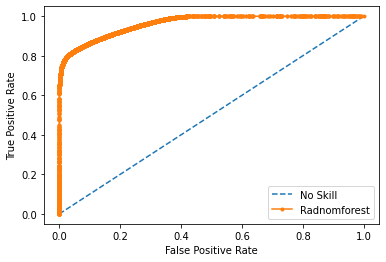

In [74]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred_df["PROB"])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_df["PROB"])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Radnomforest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

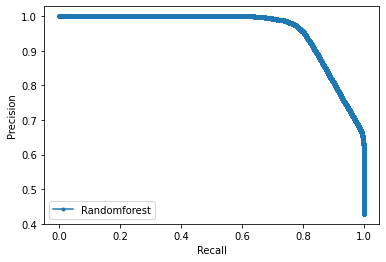

In [75]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_df["PROB"])
plt.plot(lr_recall, lr_precision, marker='.', label='Randomforest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

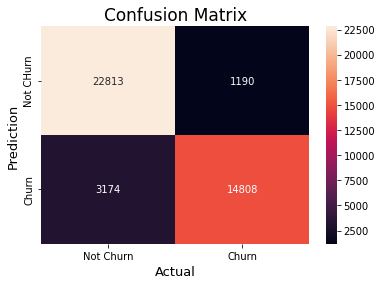

In [76]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Churn','Churn'],
            yticklabels=['Not CHurn','Churn'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [77]:
scores_data = pd.DataFrame({"ns_probs":ns_probs,
                            "y_test":y_test,
                            "y_pred":pred_df["PREDICTION"],
                            "act_probs":pred_df["PROB"]})

In [78]:
scores_data

,ns_probs,y_test,y_pred,act_probs
264990,0,1,1,0.795226
141510,0,1,1,0.996864
235125,0,1,1,0.935888
96688,0,1,1,0.830921
89794,0,0,0,0.000075
...,...,...,...,...
227766,0,0,0,0.001287
13714,0,0,0,0.395558
95085,0,1,1,0.884156
252677,0,0,0,0.000093


In [79]:
scores_data.to_csv("/data/scores.csv", index=False)

In [80]:
# Define or use the prediction function
def model_prediction_score_func(dataframe):
    # Ensure 'dataframe' has the correct features required by the model
    return pipeline.predict(dataframe)  # Use your trained pipeline/model here
 
# Assuming df is your input DataFrame with the necessary features
Original_df['Model_Output'] = model_prediction_score_func(Original_df)
 
# If you have a DataFrame with test data and you want to merge predictions
# Assuming X_test is the DataFrame for which predictions are made
#X_test_with_predictions = X_test.copy()
#X_test_with_predictions['Model_Output'] = model_prediction_score_func(X_test)
 
# Display the first few rows to verify
#print(X_test_with_predictions.head())

In [81]:
Original_df

,SALARY,EMPLOYEE_ID,JOB_SATISFACTION,PERCENTAGE_SALARY_HIKE,PERFORMANCE_RATING,OVER_TIME,RELATIONSHIP_SATISFACTION,CHURN_STATUS_TABLE,CHURN_VALUE_TABLE,CITY,...,SUM_OF_TENURE,SUM_OF_AGE,JOB_STARTDATE,JOB_ENDDATE,OVERTIME_HOURS,WORK_LIFE_BALANCE,BUSINESS_TRAVEL,ENVIRONMENT_SATISFACTION,USER_ID,Model_Output
0,43118.65,94215814,High,20,Outstanding,No,Medium,FALSE,0,Charlotte,...,0,0,2016-06-01,2019-08-01,4,Best,Travel Rarely,Medium,334493477,0
2,36394.69,14265310,Low,13,Good,No,Medium,FALSE,0,Pittsburgh,...,0,0,2017-06-01,2018-07-01,8,Good,Travel Rarely,High,154131612,0
3,96880.66,38467325,Low,21,Good,No,Very High,FALSE,0,Dallas,...,0,0,2019-09-01,2024-07-01,14,Bad,Travel Rarely,Very High,518711452,0
4,97579.66,98539130,High,17,Good,No,Low,FALSE,0,Dallas,...,0,0,2019-09-01,2024-08-01,9,Best,Travel Frequently,Low,518711452,0
6,48058.60,80207814,High,14,Outstanding,No,Very High,TRUE,1,Charlotte,...,0,0,2013-10-01,2020-12-01,3,Good,Travel Rarely,Medium,824143529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,101713.50,66752547,Low,17,Good,No,Very High,FALSE,0,Houston,...,0,0,2021-12-01,2023-06-01,1,Good,Travel Rarely,Low,492160448,0
299996,101640.50,61579487,High,13,Excellent,No,Very High,FALSE,0,Houston,...,0,0,2021-12-01,2023-06-01,1,Best,Travel Frequently,Low,492160448,0
299997,101998.50,48056583,Very High,21,Outstanding,No,Medium,FALSE,0,Houston,...,0,0,2021-12-01,2023-06-01,1,Good,Travel Rarely,Low,492160448,0
299998,101306.50,86413761,Medium,20,Low,No,Low,FALSE,0,Houston,...,37548,9563,2021-12-01,2023-06-01,1,Best,Travel Frequently,Medium,492160448,0


In [82]:
Original_df.to_csv("/data/Hr_Attrition_Data.csv", index=False)

In [83]:
con = snowflake.get_connection("HR_ATTRITION")

Exception occurred in getting snowflake connection: 'connectionSources'


In [84]:
import pandas as pd
if 'Model_Output' in Original_df:
    Original_df['Model_Output_Values'] = Original_df['Model_Output'].astype(bool)
print(Original_df.head())


     SALARY EMPLOYEE_ID JOB_SATISFACTION  PERCENTAGE_SALARY_HIKE  \
0  43118.65    94215814             High                      20   
2  36394.69    14265310              Low                      13   
3  96880.66    38467325              Low                      21   
4  97579.66    98539130             High                      17   
6  48058.60    80207814             High                      14   

  PERFORMANCE_RATING OVER_TIME RELATIONSHIP_SATISFACTION CHURN_STATUS_TABLE  \
0        Outstanding        No                    Medium              FALSE   
2               Good        No                    Medium              FALSE   
3               Good        No                 Very High              FALSE   
4               Good        No                       Low              FALSE   
6        Outstanding        No                 Very High               TRUE   

   CHURN_VALUE_TABLE        CITY  ... SUM_OF_AGE JOB_STARTDATE JOB_ENDDATE  \
0                  0   Charlotte  ... 

In [85]:
file = 'HR_Attrition_Data.csv'
Original_df.to_csv(file , index=False)

In [86]:
file

'HR_Attrition_Data.csv'

In [87]:
snowflake.execute_query(f"PUT file://{file} @VISHAL_DATABASE.PUBLIC.HR_ATTRITION")

User name picked from OS env: vishal.baldwa@fosfor.com
Fetching connections created by vishal.baldwa@fosfor.com user
Connection names fetched ['HR Attrition conn'], created by vishal.baldwa@fosfor.com
Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f097dbbf910>
Please close the connection after use!
Exception occurred in execute_query: Unknown error
